In [1]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [2]:
import os
import collections

songs = collections.defaultdict(set)
song_names = dict()
for f in sorted(os.listdir('songs')):
    if f[0] == '.':
        continue
    
    for i, l in enumerate(open('songs/' + f, 'r').readlines()):
        if i == 0:
            song_names[f.split(".")[0]] = l.strip()
        # Ignore song name
        if i < 2:
            continue
        
        arr = l.strip().split(" ")
        
        for a in arr:
            if a == '':
                continue
            if a not in model.vocab:
                continue
            songs[f.split(".")[0]].add(a)

print(songs)
song_years = sorted(list(songs.keys()))
song_years

defaultdict(<class 'set'>, {'1969': {'our', 'we', 'lamp', 'white', 'blood', 'stormy', 'free', 'guide', 'be', 'There', 'pure', 'are', 'tranquil', 'as', 'see', 'new', 'bright', 'all', 'out', 'happy', 'stars', 'yet', 'the', "There's", 'Crimson', 'love', 'truth', 'Reach', 'Youthful', 'for', 'Each', 'is', 'moon', 'proud', 'bearing', 'can', 'five', 'flag', 'sea'}, '1987': {'my', 'harmony', 'our', 'time', 'so', 'roar', 'friends', 'we', 'For', 'Prosperity', 'said', 'All', 'We', 'seemed', 'strong', 'justice', 'on', 'free', 'was', 'reaching', "it's", 'ourselves', 'This', 'people', 'Singapore', 'but', 'marching', 'Based', "We're", 'forevermore', 'destiny', 'peace', 'achieve', 'stand', 'There', 'troubles', 'that', 'are', 'when', 'come', 'this', 'built', 'as', 'That', 'Singaporeans', 'society', 'happiness', 'much', 'united', 'out', 'here', 'belong', 'build', 'citizens', 'democratic', 'lion', 'us', 'nation', 'did', 'the', 'Regardless', 'equality', 'language', 'one', 'Pledge', "We've", 'common', 'So'

['1962',
 '1967',
 '1969',
 '1984',
 '1986',
 '1987',
 '1990',
 '1991',
 '1997',
 '1999',
 '1999-2',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007-2',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2015',
 '2016',
 '2017']

In [3]:
import numpy as np
import copy

centroids = np.zeros((len(song_years), 300))

for i in range(len(song_years)):
    l = list(songs[song_years[i]])
    centroids[i] = copy.copy(model[l[0]])
    
    for w in range(1, len(l)):
        centroids[i] += model[l[w]]
    
    centroids[i] /= len(l)

In [4]:
dist = np.zeros((len(songs.keys()), len(songs.keys())))

In [5]:
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i, j] = np.linalg.norm(centroids[i] - centroids[j])

In [6]:
dist

array([[0.        , 0.76210682, 0.80615586, 0.77311079, 0.85615968,
        0.85412788, 0.81661097, 0.81463097, 0.81913686, 0.77116689,
        0.83623545, 0.80386098, 0.73586541, 0.82189191, 0.78661849,
        0.80779135, 0.82620195, 0.84721065, 0.74535006, 0.71985116,
        0.77473069, 0.78996276, 0.82570055, 0.82730643, 0.73669154,
        0.76258229, 0.83679798, 0.6983311 , 0.73510364],
       [0.76210682, 0.        , 0.53030509, 0.51034289, 0.4923526 ,
        0.48656663, 0.43964593, 0.50076211, 0.45225913, 0.44631732,
        0.50157783, 0.44089934, 0.35729797, 0.46270388, 0.49535204,
        0.38946317, 0.43753545, 0.55607284, 0.41842588, 0.43023312,
        0.43068163, 0.40391503, 0.43853906, 0.45247265, 0.43057345,
        0.43940481, 0.4323332 , 0.41300473, 0.48517689],
       [0.80615586, 0.53030509, 0.        , 0.62351021, 0.59520261,
        0.55816038, 0.53809353, 0.59543631, 0.52732393, 0.52257827,
        0.54703527, 0.48663997, 0.47002208, 0.56706566, 0.5098998 ,
  

In [7]:
out = open('dist.txt', 'w')
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        out.write(str(dist[i, j]).ljust(20) + ' ')
    out.write('\n')
out.close()

In [8]:
import matplotlib.pyplot as plt

plt.plot(centroids[:,2], centroids[:,3], 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(centroids)
labels = gmm.predict(centroids)

In [10]:
for s, l in sorted(zip(song_years, labels), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

1969     Five Stars Arising                                 0
1986     Count On Me Singapore                              0
1987     We Are Singapore                                   0
1997     Future In My Dreams                                0
1999-2   Together                                           0
2002     We Will Get There                                  0
2004     Home                                               0
2005     Reach Out For The Skies                            0
2006     My Island Home                                     0
2008     Shine For Singapore                                0
2010     Song for Singapore                                 0
2013     One Singapore                                      0
1999     Moments of Magic                                   1
2000     Shine On Me                                        1
2015     Our Singapore                                      1
1967     Singapore Town                                     2
1984    

In [11]:
from joblib import dump, load
#dump(gmm, 'gmm-5cluster-best.joblib')

ImportError: No module named 'joblib'

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(centroids)
kmeans.labels_

array([4, 2, 2, 3, 3, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 3, 3], dtype=int32)

In [13]:
for s, l in sorted(zip(song_years, kmeans.labels_), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

1991     It's the Little Things                             0
2006     My Island Home                                     0
1987     We Are Singapore                                   1
1990     One People, One Nation, One Singapore              1
1997     Future In My Dreams                                1
1999-2   Together                                           1
2000     Shine On Me                                        1
2002     We Will Get There                                  1
2004     Home                                               1
2005     Reach Out For The Skies                            1
2008     Shine For Singapore                                1
2009     What Do You See?                                   1
2010     Song for Singapore                                 1
2011     In A Heartbeat                                     1
2013     One Singapore                                      1
2015     Our Singapore                                      1
1967    

In [14]:

import gensim
model = gensim.models.Word2Vec(sentences_split, min_count=2)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

NameError: name 'sentences_split' is not defined

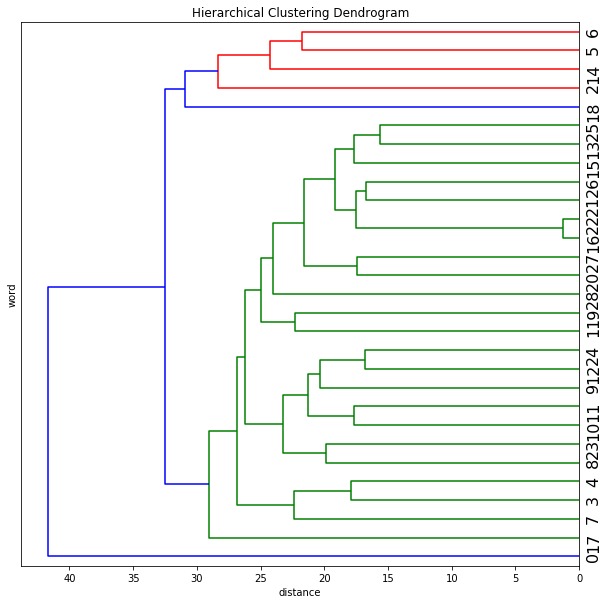

1962.txt 0 1967.txt 1 1969.txt 2 1984.txt 3 1986.txt 4 1987.txt 5 1990.txt 6 1991.txt 7 1997.txt 8 1999-2.txt 9 1999.txt 10 2000.txt 11 2001.txt 12 2002.txt 13 2003.txt 14 2004.txt 15 2005.txt 16 2006.txt 17 2007-2.txt 18 2007.txt 19 2008.txt 20 2009.txt 21 2010.txt 22 2011.txt 23 2012.txt 24 2013.txt 25 2015.txt 26 2016.txt 27 2017.txt 28 

In [22]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
l = linkage(centroids, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
)
plt.show()

songs = sorted(os.listdir('songs'))
for i in range(len(songs)):
    print(songs[i], i, end=' ')